Adnan Akbas
# Activity recognition
## Preprocessing feature dataset

In [52]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [53]:
features_dataset = pd.read_csv('../../data/activity_features_2.csv', index_col=0)

### Category to Non-binary categories

In [54]:
activities = ['lopen', 'rennen', 'springen', 'staan', 'traplopen', 'zitten']

features_dataset[['activity_walking', 'activity_running', 'activity_jumping', 'activity_standing', 'activity_traplopen',
                  'activity_traplopen', 'activity_sitten', 'activity_walking']] = 0

In [55]:
features_dataset.loc[(features_dataset['activiteit'] == 'lopen'), 'activity_walking'] = 1
features_dataset.loc[(features_dataset['activiteit'] == 'rennen'), 'activity_running'] = 1
features_dataset.loc[(features_dataset['activiteit'] == 'springen'), 'activity_jumping'] = 1
features_dataset.loc[(features_dataset['activiteit'] == 'staan'), 'activity_standing'] = 1
features_dataset.loc[(features_dataset['activiteit'] == 'traplopen'), 'activity_traplopen'] = 1
features_dataset.loc[(features_dataset['activiteit'] == 'zitten'), 'activity_sitten'] = 1
features_dataset.drop('activiteit', axis=1, inplace=True)

Replacing NaN with 0

In [56]:
features_dataset['std_vert_acc'].fillna(0, inplace=True)
features_dataset['avg_vert_acc'].fillna(0, inplace=True)
features_dataset['peak_distance_x'].fillna(0, inplace=True)
features_dataset['peak_distance_y'].fillna(0, inplace=True)
features_dataset['peak_distance_z'].fillna(0, inplace=True)

In [57]:
features_dataset.head()

,std_vert_acc,avg_vert_acc,peak_distance_x,peak_distance_y,peak_distance_z,activity_walking,activity_running,activity_jumping,activity_standing,activity_traplopen,activity_sitten
0,0.415354,0.180017,150.002,150.001,300.003,1,0,0,0,0,0
1,0.562155,0.189236,399.993,100.001,0.000,1,0,0,0,0,0
2,0.586077,0.157862,250.004,199.998,0.000,1,0,0,0,0,0
3,0.545233,0.147817,999.996,249.996,0.000,1,0,0,0,0,0
4,0.539769,0.154424,349.997,50.002,0.000,1,0,0,0,0,0


## Preparing feature dataset for learning
### Splitting in x and y

In [58]:
x = features_dataset[['std_vert_acc', 'avg_vert_acc', 'peak_distance_x', 'peak_distance_y', 'peak_distance_z']]
y = features_dataset[['activity_walking', 'activity_running', 'activity_jumping', 'activity_standing', 'activity_traplopen', 'activity_sitten']]
train_x, valid_x, train_y, valid_y = train_test_split(x,y, test_size=0.2, stratify=y)

In [59]:
train_x.head()

,std_vert_acc,avg_vert_acc,peak_distance_x,peak_distance_y,peak_distance_z
5301,0.000000,0.000000,0.000,0.000,0.000
2159,0.410852,0.214348,50.001,100.003,250.004
477,0.861522,0.277530,750.004,500.008,0.000
2001,0.193048,-0.067183,549.998,100.000,249.999
2926,0.027522,-0.905377,149.999,249.999,0.000


In [60]:
train_y.head()

,activity_walking,activity_running,activity_jumping,activity_standing,activity_traplopen,activity_sitten
5301,0,1,0,0,0,0
2159,0,1,0,0,0,0
477,0,1,0,0,0,0
2001,0,0,1,0,0,0
2926,0,0,0,0,0,1


### Training

In [61]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(train_x, train_y)

[Text(1573.8705379276153, 2961.923076923077, 'X[0] <= 0.231\ngini = 0.263\nsamples = 5496\nvalue = [[4236, 1260]\n[4252, 1244]\n[5259, 237]\n[4255, 1241]\n[5223, 273]\n[4255, 1241]]'),
 Text(606.4983770761031, 2845.769230769231, 'X[1] <= 0.856\ngini = 0.215\nsamples = 2961\nvalue = [[2806, 155]\n[2791, 170]\n[2845, 116]\n[1730, 1231]\n[2911, 50]\n[1722, 1239]]'),
 Text(266.6283852875558, 2729.6153846153848, 'X[1] <= -0.582\ngini = 0.184\nsamples = 1833\nvalue = [[1719, 114]\n[1701, 132]\n[1717, 116]\n[652, 1181]\n[1794, 39]\n[1582, 251]]'),
 Text(82.99454635597422, 2613.4615384615386, 'X[1] <= -0.992\ngini = 0.129\nsamples = 149\nvalue = [[149, 0]\n[149, 0]\n[149, 0]\n[110, 39]\n[149, 0]\n[39, 110]]'),
 Text(76.8468021814576, 2497.3076923076924, 'gini = 0.0\nsamples = 38\nvalue = [[38, 0]\n[38, 0]\n[38, 0]\n[38, 0]\n[38, 0]\n[0, 38]]'),
 Text(89.14229053049083, 2497.3076923076924, 'X[1] <= -0.902\ngini = 0.152\nsamples = 111\nvalue = [[111, 0]\n[111, 0]\n[111, 0]\n[72, 39]\n[111, 0]\n[

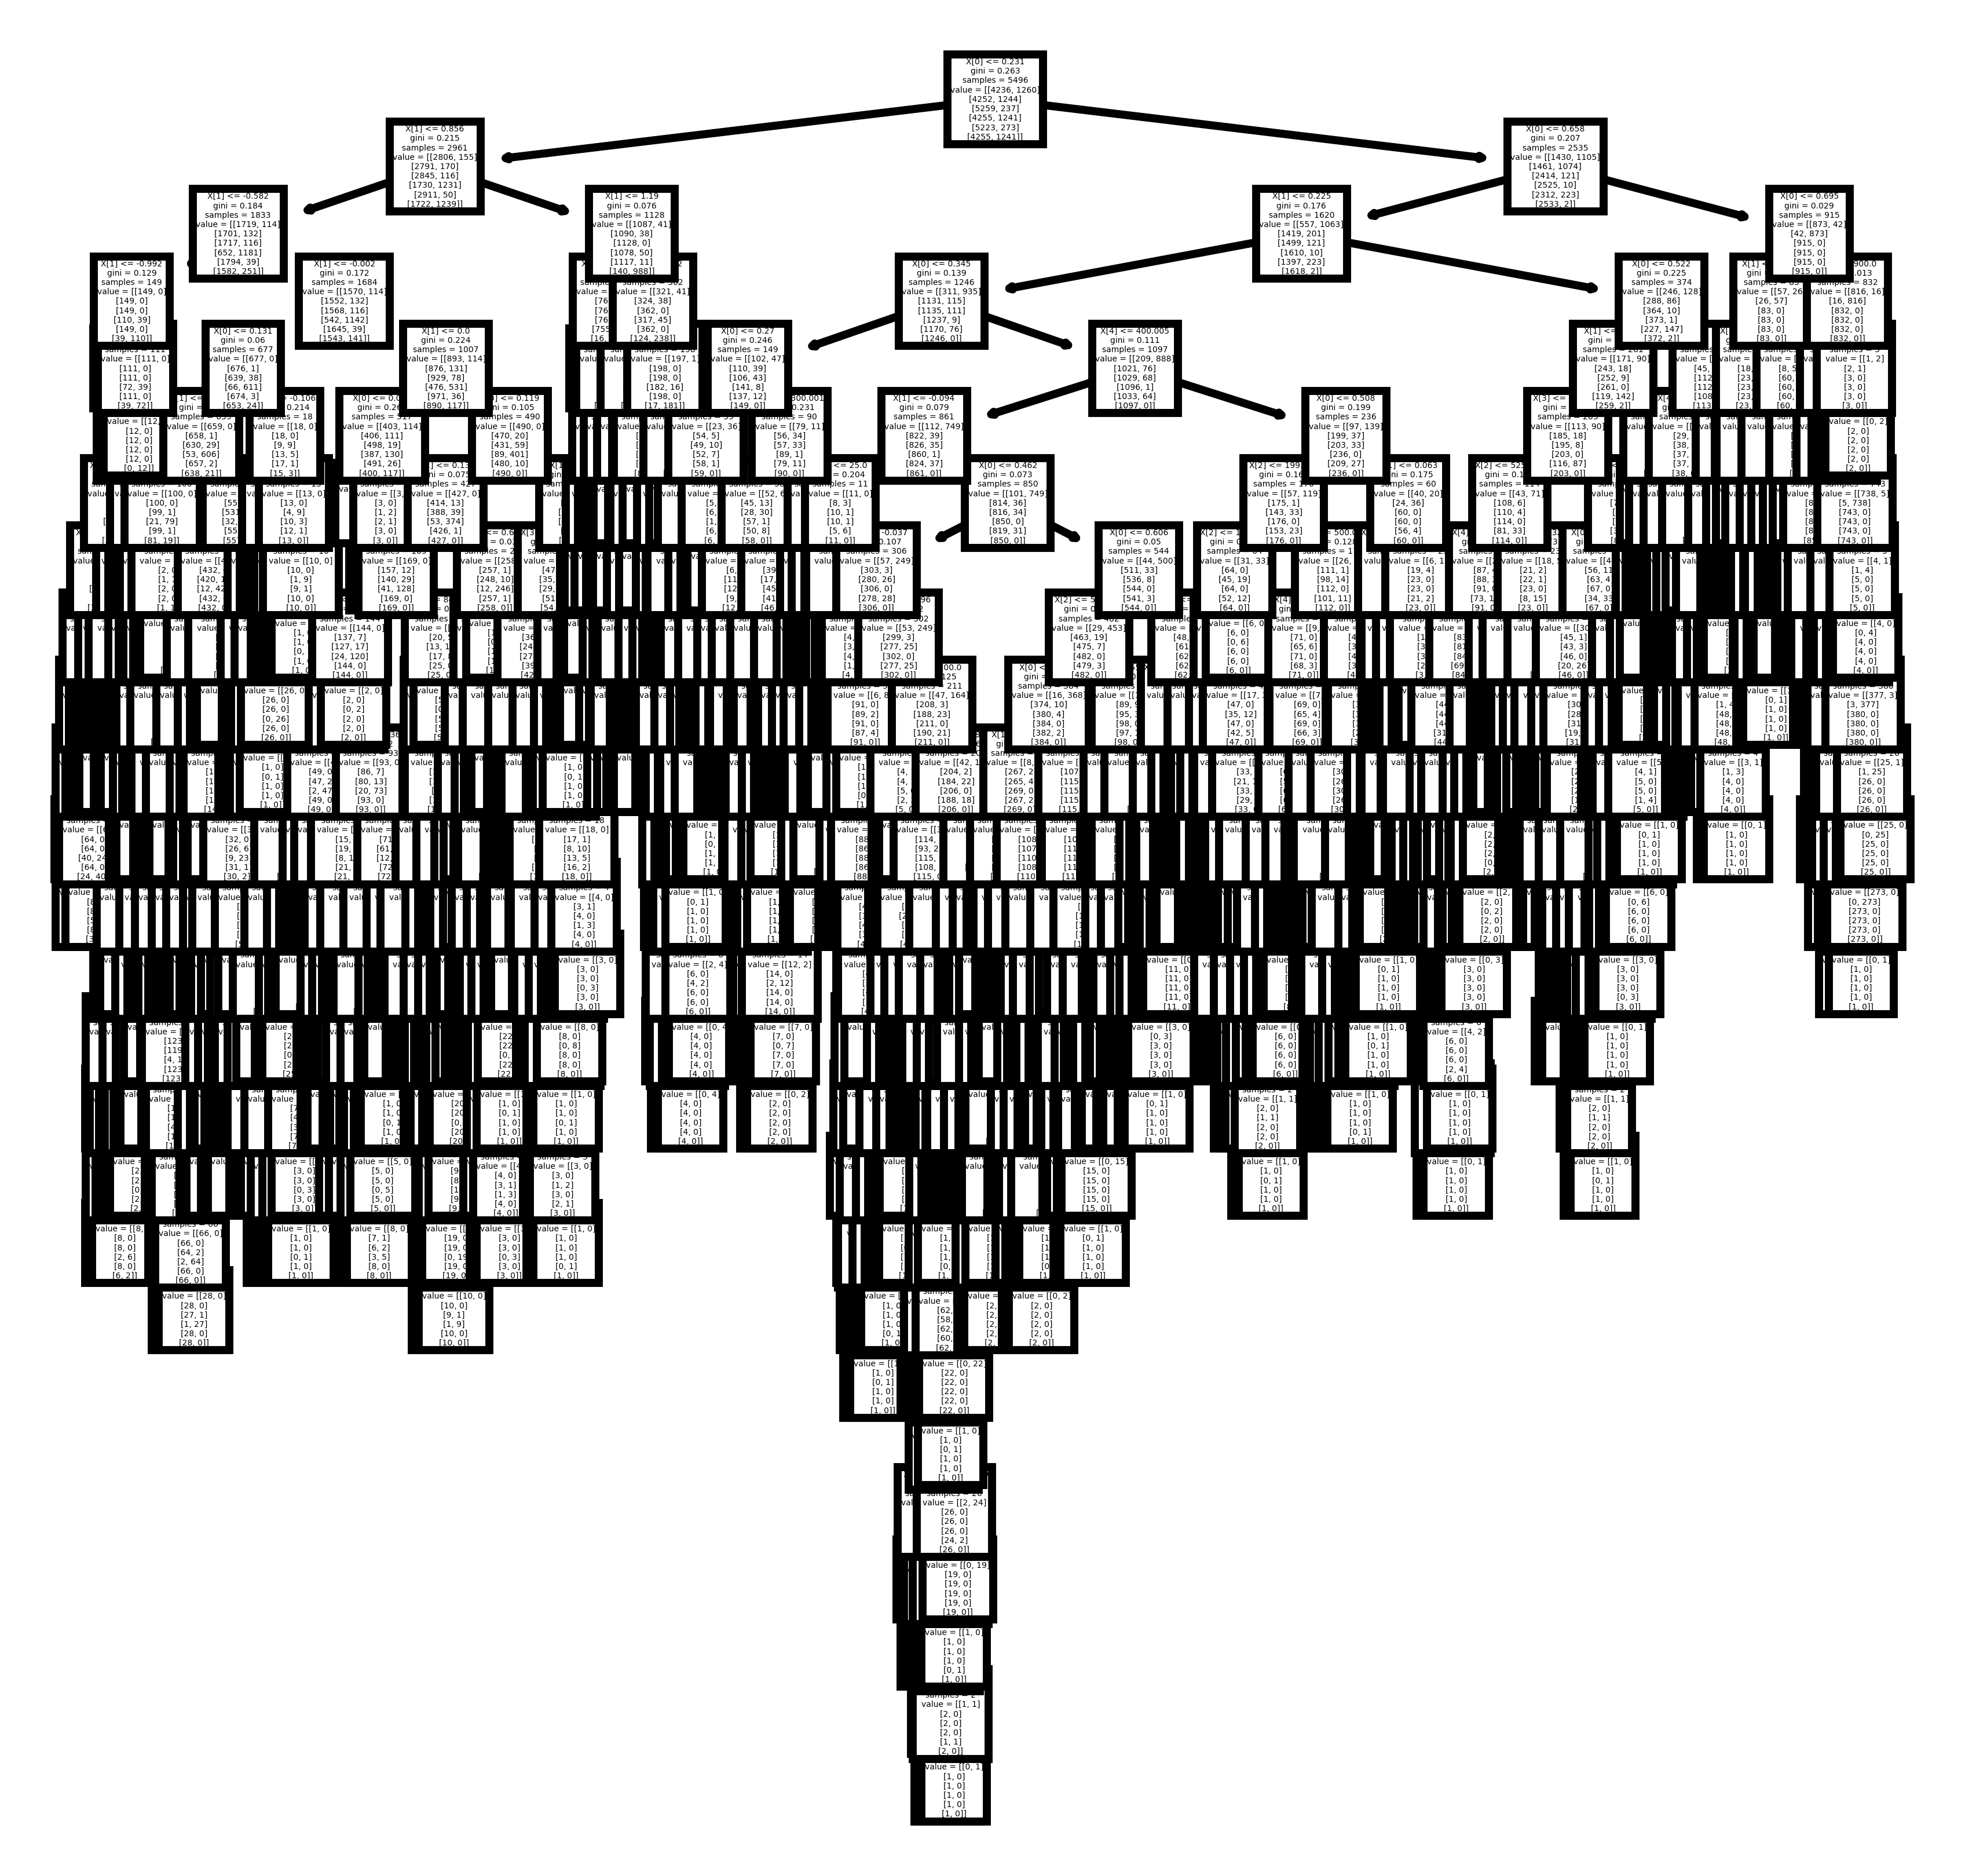

In [62]:
#import matplotlib.pyplot as plt
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=1000)
#tree.plot_tree(dtc)

###  Metrics
#### Accuract score
In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [64]:
prediction_y = dtc.predict(valid_x)
accuracy_score(valid_y, prediction_y, normalize=True)

0.7338181818181818

#### Precision score
The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

In [65]:
precision_score(valid_y, prediction_y, average='micro')

0.8500421229991575

#### recall score
The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [66]:
recall_score(valid_y, prediction_y , average='micro')

0.7338181818181818